
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 5</p>
## <p style="text-align: center;">Total points: 55</p>
## <p style="text-align: center;">Due: Tuesday, December 3rd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Please ensure that the notebook you have uploaded on Canvas is the correct one, you could download the notebook from Canvas to double check that you have submitted the correct version on your notebook.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Christopher Henson - cgh966
2. Rawini Dias - rwd635

# Question 1 - Bayesian Belief Network (15 pts)

**Q1.1** (10pts) Consider the Bayes' Net over 4 Random Variables - $D,Z,T1,T2$ with the structure shown below, and joint probability distribution $P(D,Z,T1,T2)$. All the variables are binary with 1 representing "true/positive" and 0 representing "false/negative". 

![bayesnetq1.png](bayesnetq1.png)

The probabilities are given below:

P(D = 1) = 0.1   
P(D = 0) = 0.9  

P(Z = 1 | D = 1) = 0.7   
P(Z = 0 | D = 1) = 0.3  
P(Z = 1 | D = 0) = 0.8  
P(Z = 0 | D = 0) = 0.2  

P(T2 = 1 | D = 1) = 0.7           
P(T2 = 0 | D = 1) = 0.3         
P(T2 = 1 | D = 0) = 0.5     
P(T2 = 0 | D = 0) = 0.5        

P(T1 = 1 | D = 1, Z = 1) = 0.9         
P(T1 = 0 | D = 1, Z = 1) = 0.1          
P(T1 = 1 | D = 1, Z = 0) = 0.8             
P(T1 = 0 | D = 1, Z = 0) = 0.2            
P(T1 = 1 | D = 0, Z = 1) = 0.6           
P(T1 = 0 | D = 0, Z = 1) = 0.4          
P(T1 = 1 | D = 0, Z = 0) = 0.1         
P(T1 = 0 | D = 0, Z = 0) = 0.9            


a.(4pts) What is the probability of having disease D(D=1) and getting a positive result on test T1(T1=1)?   
b.(3pts) What is the probability of not having disease D(D=0) and getting a positive result on test T1(T1=1)?   
c.(3pts) What is the probability of having disease D given a positive result on test T1?   


#### Answer:



a) 0.087

b) 0.450

c) 0.162

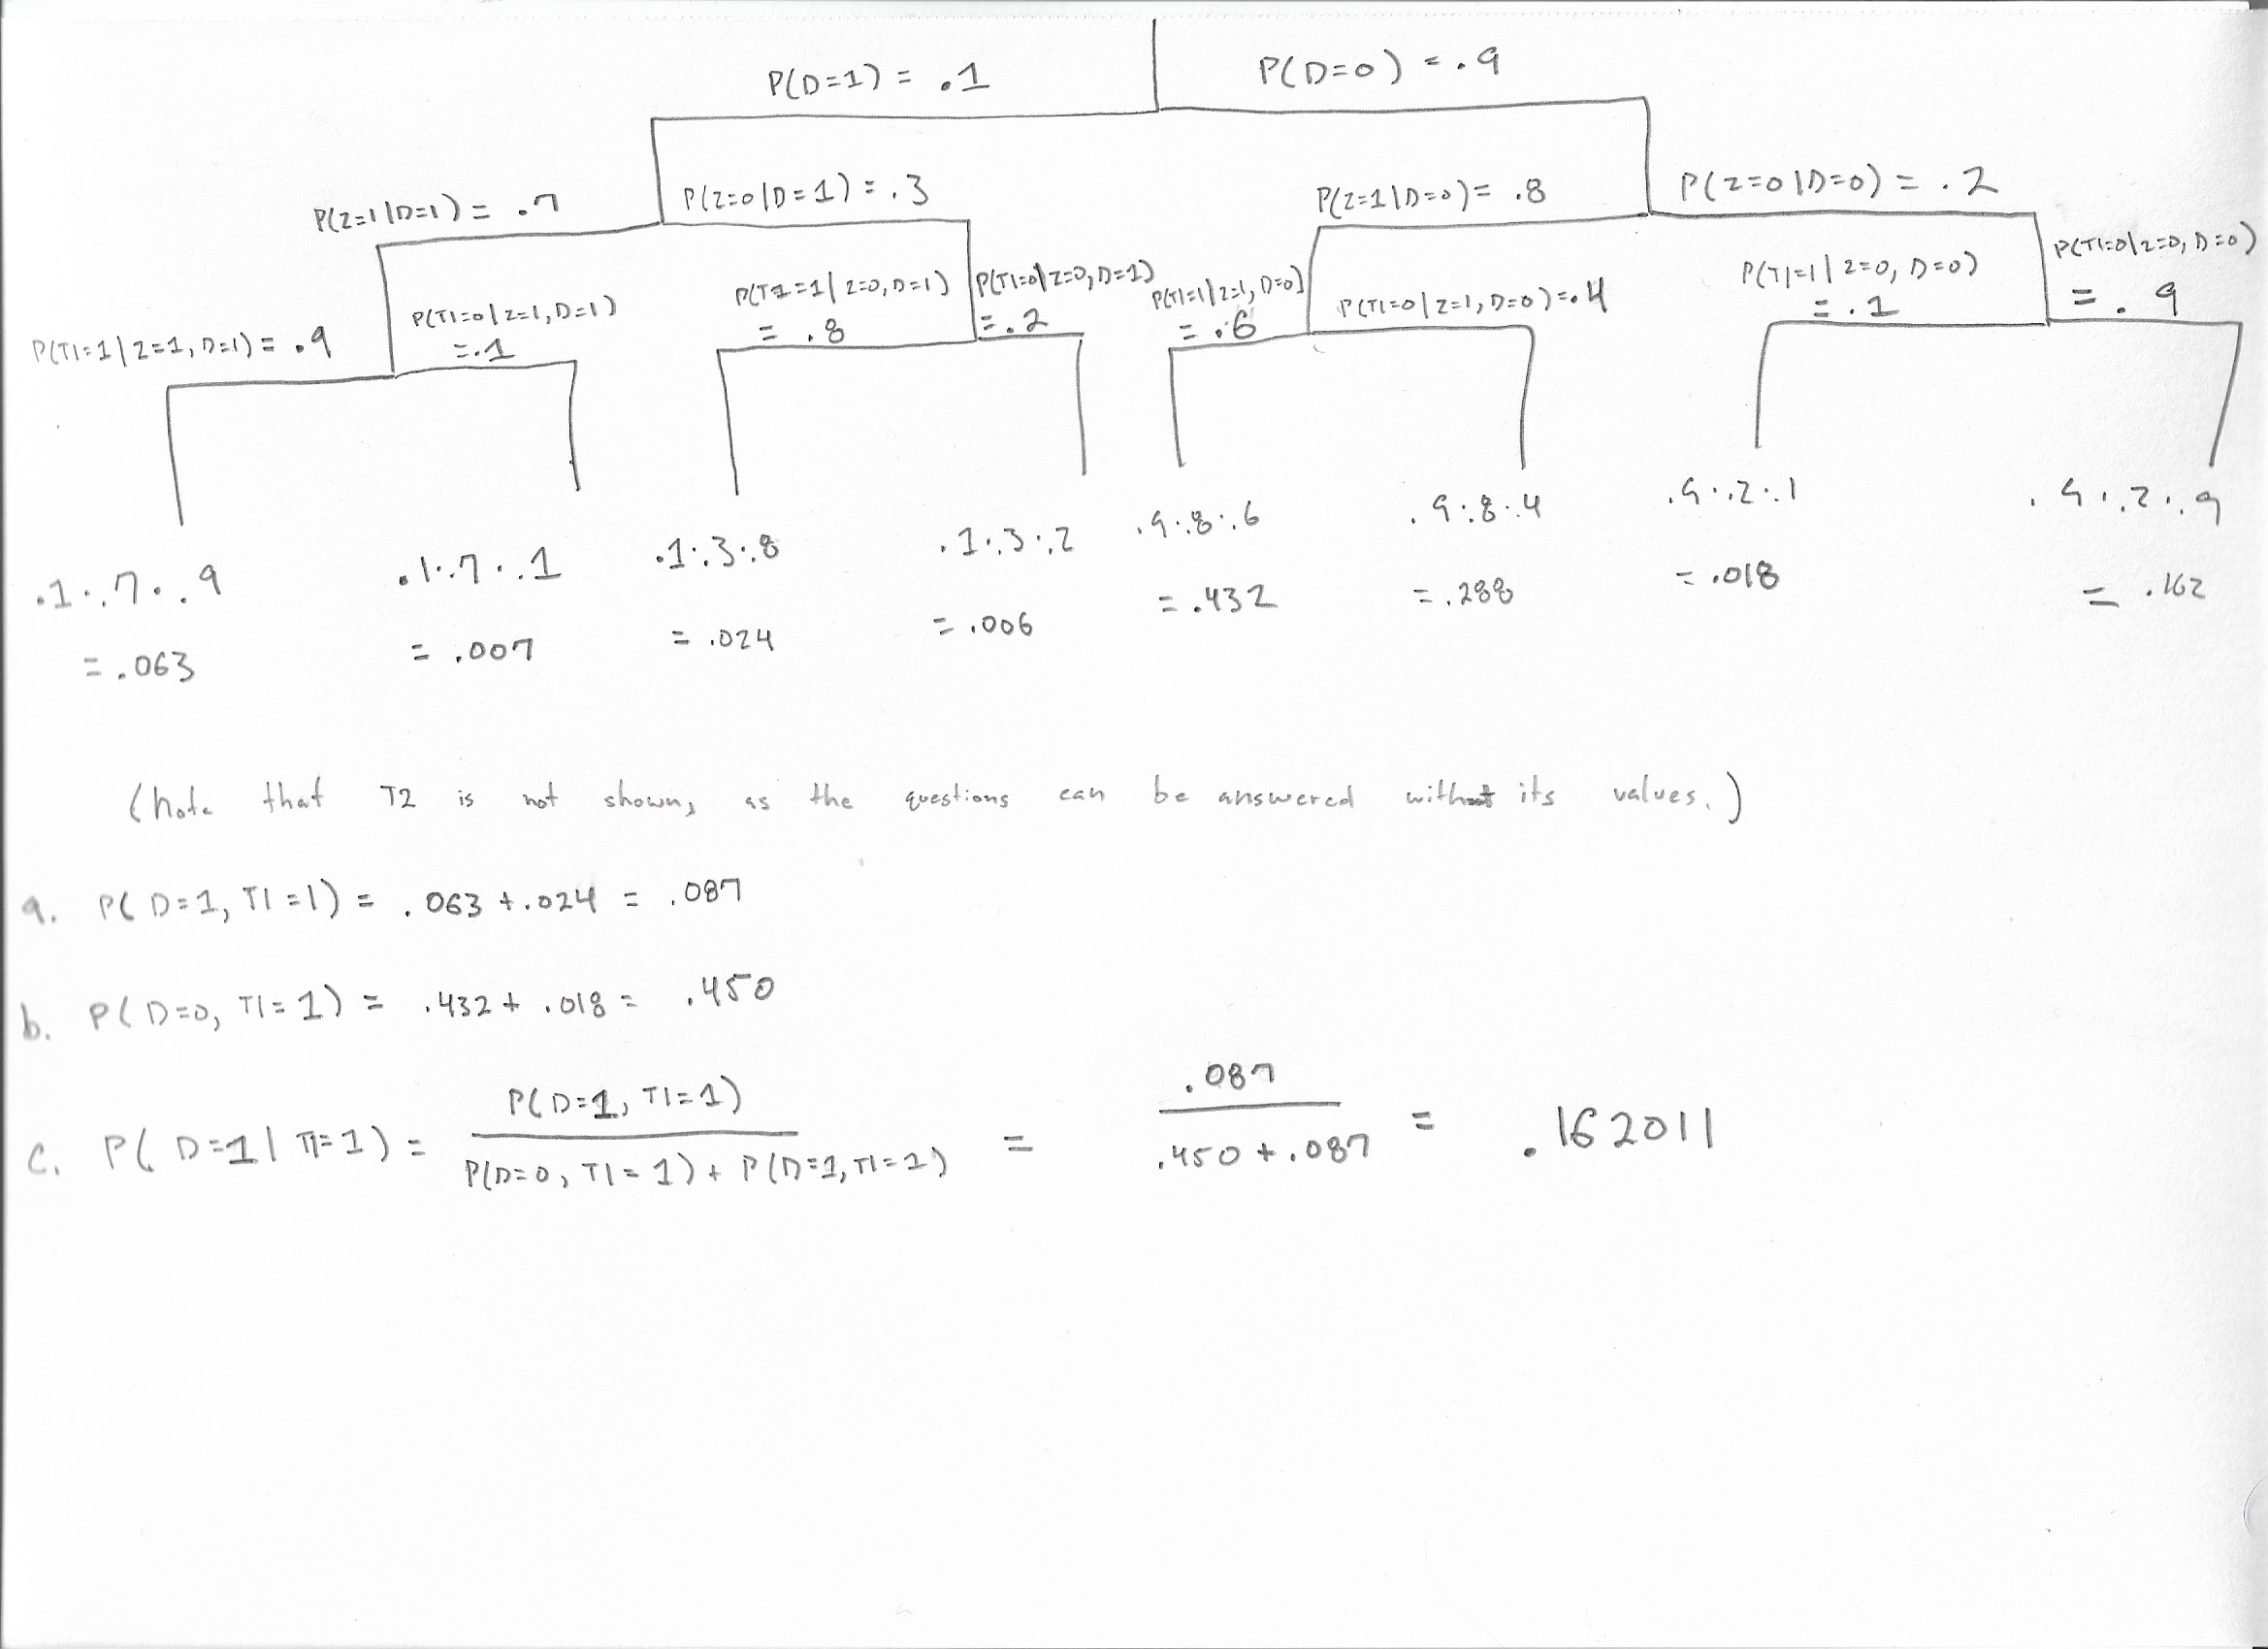

In [2]:
from IPython.display import Image
Image("q1_scan.png")

**Q1.2**(5pts) Draw a Bayesian Network with these Random Variables - $A, B, C, D, E, F, G, H$ whose joint distribution corresponds to -
$P(A | B,C,E) P(B | D,E) P(C | F,H) P(D | G) P(E| G,H) P(F | H) P(G) P(H)$

#### Answer:

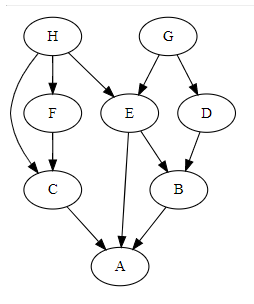

In [1]:
from IPython.display import Image
Image("q1_graph.png")

# Question 2 - K-Nearest Neighbours and Ensemble (40pts)

In this problem, we will continue with the Churn Prediction from the last homework. You can reuse the code for pipelines which we have provided. The data has been split into train and validation sets; please do not change this.


1. Build K-Nearest Neighbours (KNN) models with different values of k ranging from 2 to 50. Plot how the train and validation AUROC varies with k. Report the best AUROC on the validation set and the corresponding value of k. (10 pts)

    We will reuse the Naive Bayes and Logistic regression models from the previous homework.
    
2. Ensemble the KNN model which obtains the best AUROC on the validation set with a Naive Bayes and Logistic regression model (with parameter class_weight='balanced') by averaging the posterior probabilities. Report the validation AUROC and F1 score. (5 pts)

3. Ensemble the KNN model which obtains the best AUROC on the validation set with a Naive Bayes and Logistic regression model (with parameter class_weight='balanced') by taking a majority vote. Report the validation F1 score. Explain why we cannot compute the AUROC in this setting. (5 pts)

    We will now compare [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (GBDT), and [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier). 
    
4. Use a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to classify the data. Find the best parameters (including *n_estimators*, *max_features* and *criterion*) using [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Report the optimal parameters obtained by GridSearch. Report the confusion matrix  and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on validation data. Plot the feature importance as well. (5pts)
5. Use [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (GBDT), and [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for this problem. Again, find the best parameters (including *n_estimators, learning_rate,* and *max_depth (GBDT only)*), and report the confusion matrix and roc_auc_score on test data for each classifier. Also, plot the feature importance for each classifier. (10pts)
6. Point out one advantage and one disadvantage of Random Forest compared to GBDT. (5pts)

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.ensemble import RandomForestClassifier,\
GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, FeatureUnion
import warnings
warnings.filterwarnings('ignore')
from sklearn.base import BaseEstimator, TransformerMixin

class OneHotEncoder(BaseEstimator, TransformerMixin):
    
    def __init__(self,col):
        self.col = col
                
    def transform(self, X):
        return pd.get_dummies(X[self.col]) 

    def fit(self, X, y=None):
        return self  
    
# Stateless transformer for selecting a specified columns
class DFSubsetSelector(BaseEstimator,TransformerMixin):
    
    def __init__(self,cols):
        self.cols = cols
        
    def transform(self ,X):
        return X[self.cols]
    
    def fit(self, X, y=None):
        return self
    
class ConcatFeatures(BaseEstimator, TransformerMixin):
    
    def __init__(self,cols,sep="_"):
        self.cols = cols
        self.sep = sep
                
    def transform(self, X):
        concat_col = self.sep.join(self.cols)
        return X.apply(lambda x : self.sep.join([x[col] for col in self.cols]) ,axis=1).to_frame(name = concat_col)

    def fit(self, X, y=None):
        return self  
    
# Transformer that does min-max transform on the specified columns
class MinMaxTransform(BaseEstimator, TransformerMixin):

    def __init__(self,cols=None):
        self.cols = cols
        self.minVec = np.zeros(len(cols))
        self.maxVec = np.zeros(len(cols))
       
    def transform(self, X):
        X[self.cols] = ((X[self.cols] - self.minVec)/(self.maxVec-self.minVec))
        return X

    def fit(self, X, y=None):
        self.minVec = (df_train[self.cols].min())
        self.maxVec = (df_train[self.cols].max())
        return self

df = pd.read_csv('hw5.csv', delimiter=',')

#DONOT CHANGE THIS
df_train = df.sample(frac=0.8,random_state=11)
df_val = df.drop(df_train.index)


X_train = df_train.drop(['Exited'],axis=1)
y_train = df_train['Exited']
X_val= df_val.drop(['Exited'],axis=1)
y_val = df_val['Exited']

continuous_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
cat_vars = ['HasCrCard','IsActiveMember',"Geography", "Gender"] 

#building the data-processing pipeline
categorical_feature_pipeline = Pipeline([
                                       ('categorical_selector' ,DFSubsetSelector(cat_vars)),
                                        ('onehot',OneHotEncoder(cat_vars))])
numerical_feature_pipeline = Pipeline([
                                       ('numerical_selector' ,DFSubsetSelector(continuous_vars)),
                                        ('normalization',MinMaxTransform(continuous_vars))])
all_feature_preprocessor= FeatureUnion(transformer_list=[('numerical_preprocessor', numerical_feature_pipeline),
                                                      ('categorical_preprocessor', categorical_feature_pipeline)])

#### Answer

#### (1)

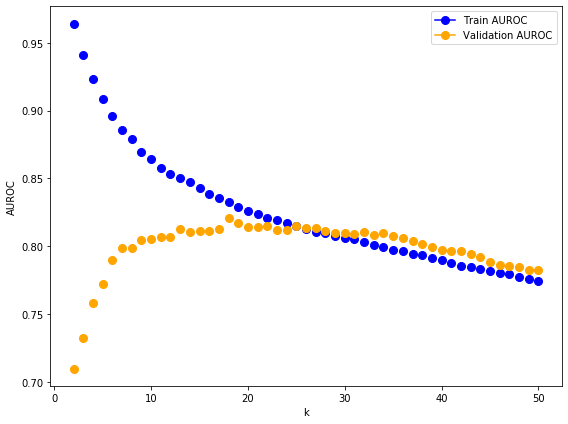

In [20]:
train_auroc_list = []
val_auroc_list = []

plt.figure(figsize = (8,6))
plt.xlabel('k')
plt.ylabel('AUROC')

for k in range(2,51):
    
    model_knn = Pipeline(steps=[('preprocessor', all_feature_preprocessor),
                      ('classifier', knn(n_neighbors = k))])
    model_knn.fit(X_train, y_train)   
    
    train_pred = model_knn.predict_proba(X_train)
    val_pred = model_knn.predict_proba(X_val)
    
    train_auroc = roc_auc_score(y_train, train_pred[:,1])
    val_auroc = roc_auc_score(y_val, val_pred[:,1])
    
    train_auroc_list.append((k, train_auroc))
    val_auroc_list.append((k, val_auroc))
    
    plt.plot(k, train_auroc, marker = 'o', color = 'blue', markersize = 8)
    plt.plot(k, val_auroc, marker = 'o', color = 'orange', markersize = 8)

plt.legend(['Train AUROC', 'Validation AUROC'], loc='best')
plt.tight_layout()
plt.show()

In [22]:
print('Best (k, AUROC) is: ', max(val_auroc_list, key = lambda x:x[1]))

Best (k, AUROC) is:  (18, 0.8205577703831526)


#### (2)

In [37]:
clf1 = knn(n_neighbors = 18)
clf2 = GaussianNB()
clf3 = LogisticRegression(class_weight='balanced')

In [38]:
soft_ensemble = Pipeline(steps=[('preprocessor', all_feature_preprocessor),
                      ('classifier', VotingClassifier(estimators = [('knn', clf1), ('gnb', clf2), ('lr', clf3)], 
                                                      voting = 'soft'))])

In [39]:
soft_ensemble.fit(X_train, y_train)

y_pred = soft_ensemble.predict(X_val)
y_score = soft_ensemble.predict_proba(X_val)

In [40]:
print('The F1 Score is ',f1_score(y_val,y_pred))
print('The AUROC Score is ',roc_auc_score(y_val, y_score[:,1]))

The F1 Score is  0.5235294117647059
The AUROC Score is  0.8404805387599915


#### (3)

In [41]:
hard_ensemble = Pipeline(steps=[('preprocessor', all_feature_preprocessor),
                      ('classifier', VotingClassifier(estimators = [('knn', clf1), ('gnb', clf2), ('lr', clf3)], 
                                                      voting = 'hard'))])

In [42]:
hard_ensemble.fit(X_train, y_train)

y_pred = hard_ensemble.predict(X_val)

In [43]:
print('The F1 Score is ',f1_score(y_val,y_pred))

The F1 Score is  0.486646884272997


Hard voting uses majority voting instead of probabilities for prediction. VotingClassifier() does not use probability values for hard voting. Therefore, we cannot compute the AUROC score without the predicted probabilities.

#### (4)

**Random Forest**

In [107]:
param_grid = {
    'classifier__n_estimators':[10, 100, 500],
    'classifier__max_features':['sqrt', 'log2', None],
    'classifier__criterion':['gini', 'entropy']}

In [108]:
pipe_rf = Pipeline(steps=[('preprocessor', all_feature_preprocessor),
                      ('classifier', RandomForestClassifier())])

In [109]:
model_rf = GridSearchCV(estimator = pipe_rf, 
                     param_grid = param_grid)

In [110]:
model_rf.fit(X_train, y_train)
print('Best parameter from GridSearch are:')
model_rf.best_params_

Best parameter from GridSearch are:


{'classifier__criterion': 'gini',
 'classifier__max_features': 'log2',
 'classifier__n_estimators': 500}

In [117]:
best_rf = Pipeline(steps=[('preprocessor', all_feature_preprocessor),
                      ('classifier', RandomForestClassifier(criterion='gini', max_features='log2', n_estimators=500))])

In [118]:
best_rf.fit(X_train, y_train)

rf_pred = best_rf.predict(X_val)

print('Confusion Matrix:')
confusion_matrix(y_val, rf_pred)

Confusion Matrix:


array([[1539,   48],
       [ 206,  207]], dtype=int64)

In [119]:
print('AUROC Score on Validation Data is:')
roc_auc_score(y_val, best_rf.predict_proba(X_val)[:,1])

AUROC Score on Validation Data is:


0.88303421717923

In [120]:
col_names = list(numerical_feature_pipeline.transform(X_train).columns) +\
            list(categorical_feature_pipeline.transform(X_train).columns)

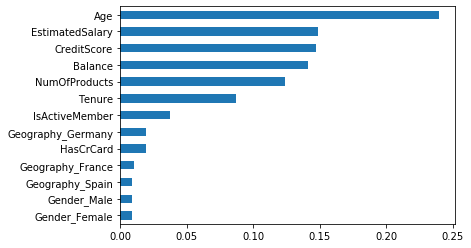

In [121]:
rf_importance = pd.Series(best_rf[1].feature_importances_, index = col_names).sort_values()
rf_importance.plot.barh()

#### (5)

**Gradient Boosting Decision Tree**

In [122]:
param_grid_gbc = {
    'classifier__n_estimators':[10, 100, 500],
    'classifier__learning_rate':[.1, .01, .001],
    'classifier__max_depth':[50, 100]}

In [123]:
pipe_gbc = Pipeline(steps=[('preprocessor', all_feature_preprocessor),
                      ('classifier', GradientBoostingClassifier())])

In [124]:
model_gbc = GridSearchCV(estimator = pipe_gbc, 
                     param_grid = param_grid_gbc)

In [125]:
model_gbc.fit(X_train, y_train)

print('Best parameter from GridSearch are:')
model_gbc.best_params_

Best parameter from GridSearch are:


{'classifier__learning_rate': 0.001,
 'classifier__max_depth': 50,
 'classifier__n_estimators': 500}

In [126]:
best_gbc = Pipeline(steps=[('preprocessor', all_feature_preprocessor),
                      ('classifier', GradientBoostingClassifier(learning_rate=0.001, max_depth=50, n_estimators=500))])

In [127]:
best_gbc.fit(X_train, y_train)

gbc_pred = best_gbc.predict(X_val)

print('Confusion Matrix:')
confusion_matrix(y_val, gbc_pred)

Confusion Matrix:


array([[1464,  123],
       [ 218,  195]], dtype=int64)

In [128]:
print('AUROC Score on Validation Data is:')
roc_auc_score(y_val, best_gbc.predict_proba(X_val)[:,1])

AUROC Score on Validation Data is:


0.7443598181959656

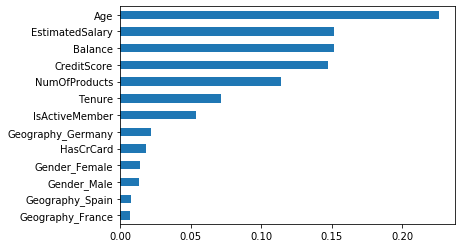

In [129]:
gbc_importance = pd.Series(best_gbc[1].feature_importances_, index = col_names).sort_values()
gbc_importance.plot.barh()

**AdaBoost**

In [130]:
param_grid_ab = {
    'classifier__n_estimators':[10, 100, 500],
    'classifier__learning_rate':[.1, .01, .001]}

In [131]:
pipe_ab = Pipeline(steps=[('preprocessor', all_feature_preprocessor),
                      ('classifier', AdaBoostClassifier())])

In [132]:
model_ab = GridSearchCV(estimator = pipe_ab, 
                     param_grid = param_grid_ab)

In [133]:
model_ab.fit(X_train, y_train)

print('Best parameter from GridSearch are:')
model_ab.best_params_

Best parameter from GridSearch are:


{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 500}

In [135]:
best_ab = Pipeline(steps=[('preprocessor', all_feature_preprocessor),
                      ('classifier', AdaBoostClassifier(learning_rate=0.1, n_estimators=500))])

In [136]:
best_ab.fit(X_train, y_train)

ab_pred = best_ab.predict(X_val)

print('Confusion Matrix:')
confusion_matrix(y_val, ab_pred)

Confusion Matrix:


array([[1526,   61],
       [ 210,  203]], dtype=int64)

In [137]:
print('AUROC Score on Validation Data is:')
roc_auc_score(y_val, best_ab.predict_proba(X_val)[:,1])

AUROC Score on Validation Data is:


0.8731887872255051

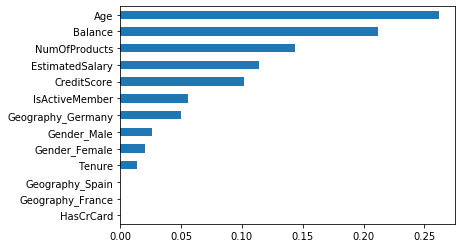

In [138]:
ab_importance = pd.Series(best_ab[1].feature_importances_, index = col_names).sort_values()
ab_importance.plot.barh()

#### (6)

**Advantage:** Random Forests are faster as the tree is built parallelly, whereas Gradient Boosting builds trees sequentially which makes it slower.
The sequential building of the tree in Gradient Boosting can make it more prone to overfitting, especially if the data is noisy, whereas Random Forests aren't as likely to overfit.

**Disadvantage:** Gradient Boosted trees are derived by optimizing an objective function, which can enable it to achieve better performance than Random Forests in certain situations.